In [2]:
!pip install tensorflow==2.12.0

INFO: pip is looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.0/586.0 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 70.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 69.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 88.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 107.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 28.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.6/79.6 MB 9.1 MB/s eta 0:00:00
  Att

In [1]:
import tensorflow as tf
print(tf.__version__)

2.12.0


In [2]:
## importing some basic libraries


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
dataset = pd.read_csv("Day11_Churn_Modelling.csv")

In [4]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
## dividing dataset into independent and dependent features

X = dataset.iloc[:,3:13]
y = dataset.iloc[:,13]

In [6]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [7]:
X.shape

(10000, 10)

In [8]:
y.head()

,Exited
0,1
1,0
2,1
3,0
4,0


In [9]:
y.shape

(10000,)

In [12]:
dataset['Geography'].value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [13]:
## Feature engineering

geogrpahy = pd.get_dummies(X['Geography'],drop_first=True).astype(int)
gender = pd.get_dummies(X['Gender'], drop_first = True).astype(int)

In [14]:
gender

,Male
0,0
1,0
2,0
3,0
4,0
...,...
9995,1
9996,1
9997,0
9998,1


In [17]:
## drop these columns

X = X.drop(['Geography','Gender'], axis = 1)

In [18]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [21]:
## concatenate the columns

X = pd.concat([X,geogrpahy, gender], axis = 1)
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0,0,1,0


In [23]:
## splitting the dataset into training and test

from sklearn.model_selection import train_test_split
X_train,X_test,y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=0)

In [24]:
X_train.shape

(8000, 14)

In [25]:
X_test.shape

(2000, 14)

In [26]:
y_train.shape

(8000,)

In [27]:
y_test.shape

(2000,)

In [28]:
## Feature scaling is very important

## For which all algorithms, feature scaling is required?

## ANN, Linear reg, logistic reg,KNN, K-means - REQUIRED

## Decision tree, random forest, XGBoost - NOT REQUIRED

In [29]:
## Feature scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [32]:
X_train.shape

(8000, 14)

In [35]:
X_test.shape

(2000, 14)

In [36]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

## Part 2: Let's create ANN (Artificial Neural Network)

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU, PReLU,ELU, ReLU
from tensorflow.keras.layers import Dropout

In [38]:
## Let's initialize the ANN

classifier = Sequential()


In [39]:
## Adding the input layer

classifier.add(Dense(units = 11, activation='relu'))

In [40]:
## adding the first hidden layer

classifier.add(Dense(units = 7, activation = 'relu'))

In [41]:
## adding the second hidden layer

classifier.add(Dense(units = 6, activation = 'relu'))

In [42]:
## adding the output layer

classifier.add(Dense(1,activation = 'sigmoid'))

In [43]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [47]:
## Early stopping

import tensorflow as tf
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [48]:
model_history = classifier.fit(X_train,y_train, validation_split = 0.33, batch_size = 10, epochs = 1000, callbacks=early_stopping)

Epoch 1/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3215 - accuracy: 0.8686 - val_loss: 0.3587 - val_accuracy: 0.8561
Epoch 2/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.3213 - accuracy: 0.8666 - val_loss: 0.3601 - val_accuracy: 0.8546
Epoch 3/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3208 - accuracy: 0.8696 - val_loss: 0.3581 - val_accuracy: 0.8554
Epoch 4/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.3215 - accuracy: 0.8671 - val_loss: 0.3584 - val_accuracy: 0.8584
Epoch 5/1000
536/536 [==============================] - 1s 3ms/step - loss: 0.3188 - accuracy: 0.8688 - val_loss: 0.3633 - val_accuracy: 0.8535
Epoch 6/1000
536/536 [==============================] - 1s 3ms/step - loss: 0.3215 - accuracy: 0.8696 - val_loss: 0.3571 - val_accuracy: 0.8584
Epoch 7/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3216 - accuracy: 0.8675 - val_loss: 0.3564 - val_accuracy:

In [49]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

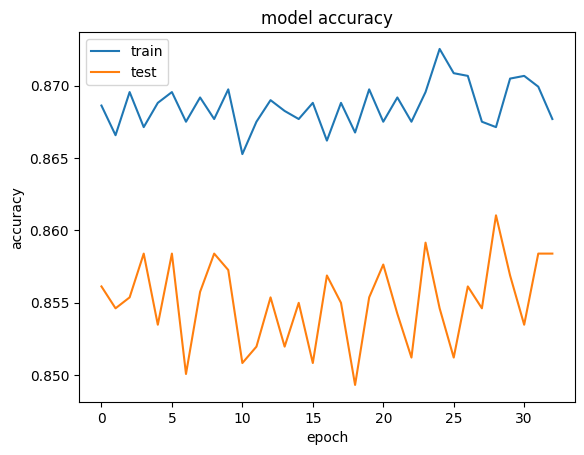

In [51]:
## summarize history for accuracy

plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc= 'upper left')
plt.show()

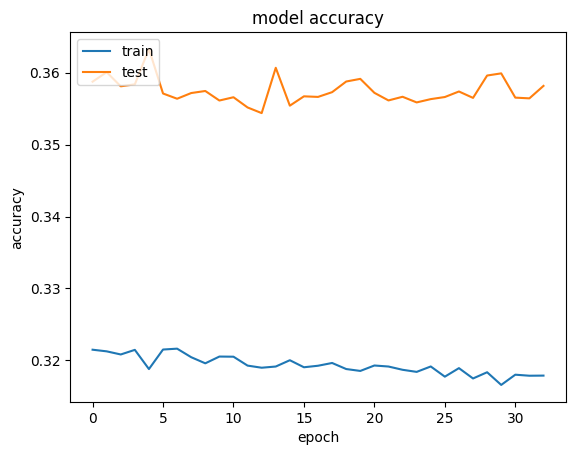

In [52]:
## summarize history for loss

plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc= 'upper left')
plt.show()

## Part 3: Making the predictions and evaluating the model

In [53]:
## Predicting the test set results

y_pred = classifier.predict(X_test)
y_pred = (y_pred>=0.5)

63/63 [==============================] - 0s 2ms/step


In [54]:
## make the confusion matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred)
cm


array([[1522,   73],
       [ 202,  203]])

In [55]:
## calculate the accuracy

from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred,y_test)

In [56]:
score

0.8625

In [58]:
## get the weights

classifier.get_weights()

[array([[ 3.01025629e-01,  1.56653170e-02, -1.12277873e-01,
         -3.77512611e-02,  1.40393108e-01,  1.64777026e-01,
          1.66492199e-03, -1.63385481e-01,  1.76326573e-01,
          2.36210786e-03, -4.16074246e-02],
        [-7.71617889e-01, -2.26791233e-01,  4.11246642e-02,
         -8.63920152e-02, -8.85236979e-01,  8.12308490e-01,
          7.89915264e-01, -7.56099761e-01, -3.84858847e-01,
         -4.48712349e-01,  2.13944063e-01],
        [ 7.21408203e-02,  1.97805062e-01, -1.65020451e-01,
         -3.96132469e-02,  3.87594104e-03, -8.01602602e-02,
          2.77529676e-02,  2.00135969e-02,  7.39912316e-02,
          4.22421157e-01,  9.88825777e-05],
        [ 3.69945735e-01,  1.41228363e-01,  4.35533017e-01,
         -6.88473046e-01, -1.63352266e-01,  1.06201679e-01,
         -3.87527645e-01, -2.40270972e-01, -7.96126783e-01,
         -1.01105962e-02, -1.06512569e-03],
        [ 3.89640570e-01,  1.94938675e-01, -2.17374310e-01,
         -1.09714186e+00,  2.91232150e-02, -